## Applied - Question 11

The question involve Auto dataset - a data frame with 392 observations on the following 9 variables.
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. 
The dataset was used in the 1983 American Statistical Association Exposition.
 1. mpg: miles per gallon
 2. cylinders: Number of cylinders between 4 and 8
 3. displacement: Engine displacement (cu. inches)
 4. horsepower: Engine horsepower
 5. weight: Vehicle weight (lbs.)
 6. acceleration: Time to accelerate from 0 to 60 mph (sec.)
 7. year: Model year (modulo 100)
 8. origin: Origin of car (1. American, 2. European, 3. Japanese)
 9. name: Vehicle name

#### Import block

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from util import print_cm

%matplotlib inline
plt.style.use('seaborn-white')

Load data

In [2]:
data_path = 'D:\\PycharmProjects\\ISLR\\data\\'
auto = pd.read_csv(f'{data_path}Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


(a) mpg01 = 0 if mpg > median and = 1 if mpg < median

In [10]:
df = pd.DataFrame.copy(auto, deep=True)
mpg_median = np.median(df.mpg)
df['mpg01'] = np.where(df['mpg']> mpg_median, 1, 0)
df = df.drop('mpg', axis=1)
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,8,302.0,140.0,3449,10.5,70,1,ford torino,0


Lets start with pairplots

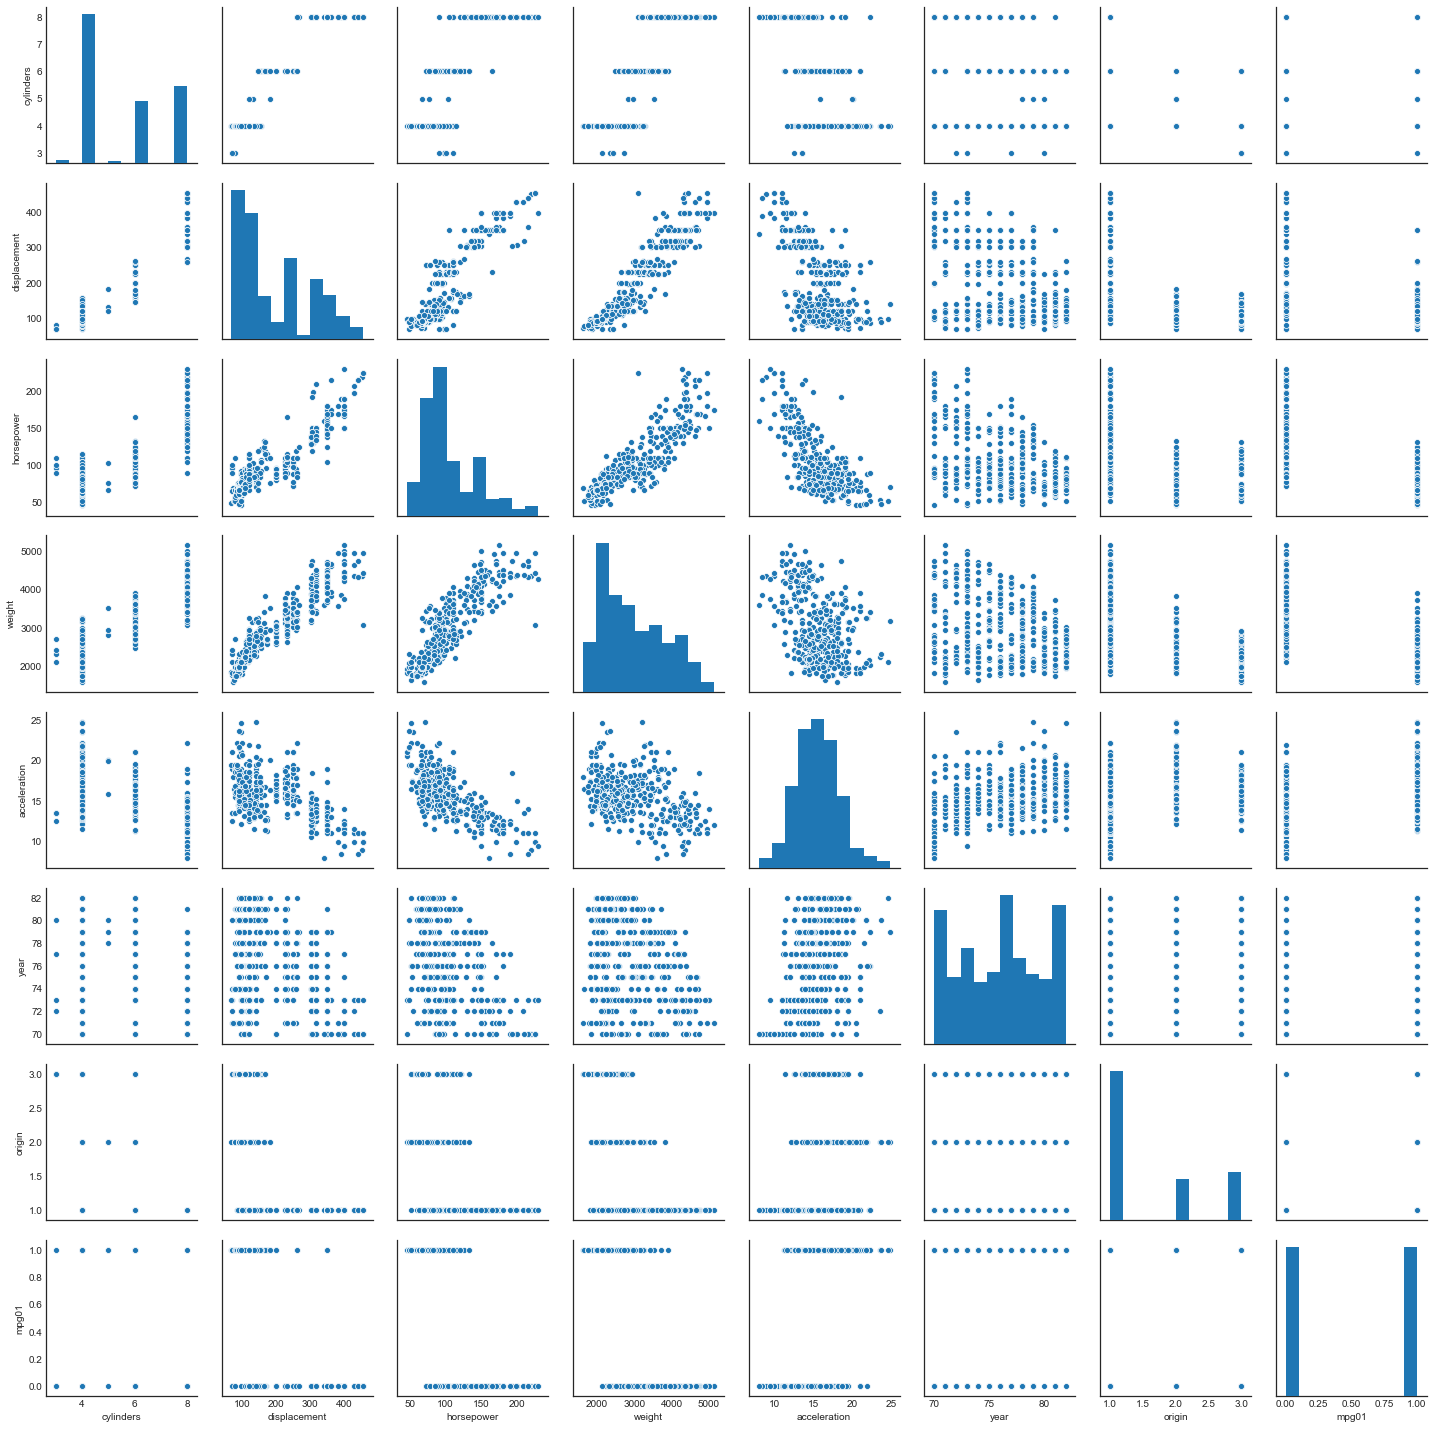

In [4]:
sns.pairplot(df)

The most stand out feature is the displacement variable. It drives both cylinders and horsepower.
Second, weight also seems to be a good candidate. Third, year will show the improvement of
technology over time. 

Below are some useful graphs

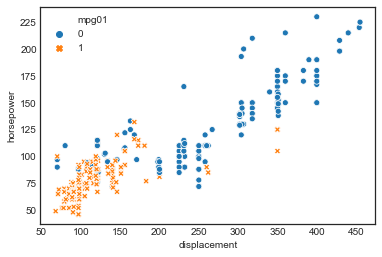

In [5]:
sns.scatterplot(x='displacement', y='horsepower', data=df, hue='mpg01', style='mpg01')

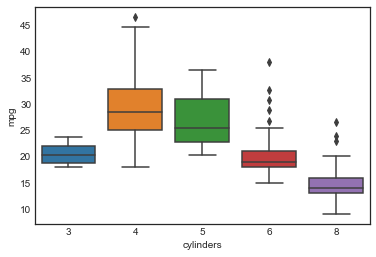

In [11]:
sns.boxplot(x='cylinders', y='mpg', data=auto)

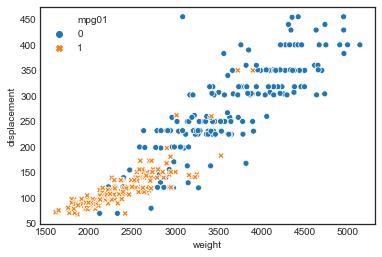

In [12]:
sns.scatterplot(x='weight', y='displacement', data=df, hue='mpg01', style='mpg01')

(c) We will let training set be 60% and test be 40%. Choosing at random.

In [25]:
X = df.drop(['mpg01','name'], axis=1)
y = df['mpg01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, shuffle=True)

(d) Fitting the LDA using weight, year, displacement, cylinders

In [26]:
lda = LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)
print_cm(y_test, pred, lda)

Confusion Matrix 
 True        0   1
Predicted        
0          71   3
1          12  71 

Classification report 
               precision    recall  f1-score   support

           0      0.959     0.855     0.904        83
           1      0.855     0.959     0.904        74

    accuracy                          0.904       157
   macro avg      0.907     0.907     0.904       157
weighted avg      0.910     0.904     0.904       157



Even with some confounding error, we can still get to 0.904 accuracy. Thus, test error is
1 - 0.904 = 0.096

(e) Now we do QDA

In [29]:
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)
print_cm(y_test, pred, qda)

Confusion Matrix 
 True        0   1
Predicted        
0          77   5
1           6  69 

Classification report 
               precision    recall  f1-score   support

           0      0.939     0.928     0.933        83
           1      0.920     0.932     0.926        74

    accuracy                          0.930       157
   macro avg      0.930     0.930     0.930       157
weighted avg      0.930     0.930     0.930       157



Seems like there is some quadratic relationship in the mpg data since we get a small boost in 
our accuracy ~ 0.93. Thus, our test error is roughly 0.7

(f) For KNN with K = 1

In [30]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)
print_cm(y_test, pred, knn)

Confusion Matrix 
 True        0   1
Predicted        
0          69   8
1          14  66 

Classification report 
               precision    recall  f1-score   support

           0      0.896     0.831     0.862        83
           1      0.825     0.892     0.857        74

    accuracy                          0.860       157
   macro avg      0.861     0.862     0.860       157
weighted avg      0.863     0.860     0.860       157



At K = 1, the result is a bit off with only 0.86 accuracy. Lets increase K to 3, 5, 10, 20

In [33]:
for i in [3, 5, 10, 20]:
    print(f'For K = {i}\n')
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    pred = knn.fit(X_train, y_train).predict(X_test)
    print_cm(y_test, pred, knn)
    print()

For K = 3

Confusion Matrix 
 True        0   1
Predicted        
0          70  10
1          13  64 

Classification report 
               precision    recall  f1-score   support

           0      0.875     0.843     0.859        83
           1      0.831     0.865     0.848        74

    accuracy                          0.854       157
   macro avg      0.853     0.854     0.853       157
weighted avg      0.854     0.854     0.854       157


For K = 5

Confusion Matrix 
 True        0   1
Predicted        
0          70   8
1          13  66 

Classification report 
               precision    recall  f1-score   support

           0      0.897     0.843     0.870        83
           1      0.835     0.892     0.863        74

    accuracy                          0.866       157
   macro avg      0.866     0.868     0.866       157
weighted avg      0.868     0.866     0.866       157


For K = 10

Confusion Matrix 
 True        0   1
Predicted        
0          72   7
1  

We can see the drop off in accuracy for KNN after K pass 10. In fact, lets just go wild!

In [52]:
x = range(1,101)
y = []
for i in range(1, 101):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    pred = knn.fit(X_train, y_train).predict(X_test)
    temp = classification_report(y_test, pred, output_dict=True)['accuracy']
    temp = round(temp, ndigits=3)
    y.append(temp)

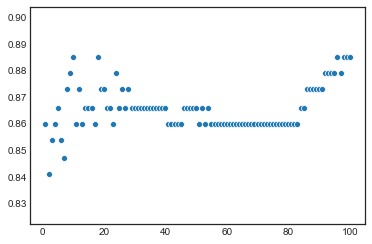

In [53]:
sns.scatterplot(x=x,y=y)


At K = 11 and near 100, we have the highest test accuracy rate. Nevertheless, the Accuracy rate is 
jumping all over the place!! 

 